In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [221]:
# More detailed CSV data
#df = pd.read_csv('intervalIDBaseIntersectionEdge200.txt', delimiter=';')
#df = pd.read_csv('intervalIDBaseIntersectionEdge.txt', delimiter=';')
df = pd.read_csv('allGreenIntervalIDBaseIntersectionEdge100.txt', delimiter=';')

In [222]:
num_df = df.iloc[:,0:65].copy().replace('()',0).replace(to_replace=r'^(.*)$', value=1, regex=True)

In [223]:
df_all_edge_detection = pd.DataFrame(np.zeros((df.index[0], 32)))
for i in range(32):
    df_all_edge_detection.iloc[:,i] = num_df.iloc[:,2*i+1] + num_df.iloc[:,2*i+2]

In [224]:
df_traffic_light = pd.DataFrame(np.zeros((df.index[0], 8)))
for i in range(65,73):
    temp = df.iloc[:,i]/2    
    df_traffic_light.iloc[:,i-65] = temp.astype(int)

In [225]:
df_intersection_vehnum = pd.DataFrame(np.zeros((df.index[0], 16)))
for i in range(73,89):   
    df_intersection_vehnum.iloc[:,i-73] = df.iloc[:,i]

In [226]:
df_outIntersection_vehnum = pd.DataFrame(np.zeros((df.index[0], 16)))
for i in range(89,105):   
    df_outIntersection_vehnum.iloc[:,i-89] = df.iloc[:,i]

In [227]:
df_intersection_crowd_size = pd.DataFrame(np.zeros((df.index[0], 8)))
for i in range(8):
    df_intersection_crowd_size.iloc[:,i] = df.iloc[:,i+105]

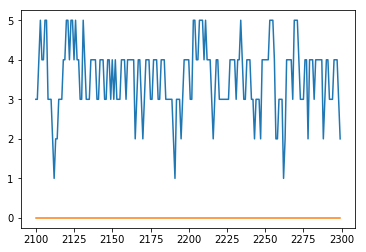

In [228]:
# Just vehicle drive into the intersection
# half
plt.figure()
plt.plot(df_intersection_crowd_size.iloc[2100:2300,2])
plt.plot(df_traffic_light.iloc[2100:2300,2])
#plt.plot(df_intersection_vehnum.iloc[:,6]+df_intersection_vehnum.iloc[:,7],color='red')

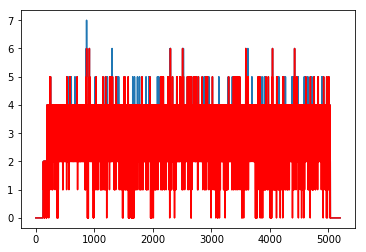

In [229]:
# Both vehicle drive in and out the intersection
# nearly equal
plt.figure()
plt.plot(df_intersection_crowd_size.iloc[:,3])
plt.plot(df_intersection_vehnum.iloc[:,6]+df_intersection_vehnum.iloc[:,7]+df_outIntersection_vehnum.iloc[:,6]+df_outIntersection_vehnum.iloc[:,7],color='red')

In [186]:
# 200m based result
entrophy = np.zeros( (60, 60) )
for i in range(12,72):
    for j in range(43,103):
        df_sum = df_intersection_vehnum.iloc[1500-i:4500-i,4].copy(deep=False).reset_index(drop=True)+df_intersection_vehnum.iloc[1500-j:4500-j,9].copy(deep=False).reset_index(drop=True) + 1
        entrophy_df = df_sum * np.log(df_sum / (1 + df_intersection_crowd_size.iloc[1500:4500,3].copy(deep=False).reset_index(drop=True)))
        entrophy[i-12][j-43] = entrophy_df.sum()

In [230]:
#100m based result
entrophy = np.zeros( (60, 60) )
for i in range(12,72):
    for j in range(43,103):
        df_sum_in_4_9 = df_intersection_vehnum.iloc[1500-i:4500-i,4].copy(deep=False).reset_index(drop=True)+df_intersection_vehnum.iloc[1500-j:4500-j,9].copy(deep=False).reset_index(drop=True) + 1
        df_sum_in_6_7 = df_intersection_vehnum.iloc[1500:4500,6].copy(deep=False).reset_index(drop=True)+df_intersection_vehnum.iloc[1500:4500,7].copy(deep=False).reset_index(drop=True) + 1
        entrophy_df = df_sum_in_4_9 * np.log(df_sum_in_4_9 / df_sum_in_6_7)
        entrophy[i-12][j-43] = entrophy_df.sum()

In [187]:
entrophy_single = np.zeros( 40 )
for i in range(20,60):
    j = 61
    df_sum = df_intersection_vehnum.iloc[2000-i:3000-i,4].copy(deep=False).reset_index(drop=True)+df_outIntersection_vehnum.iloc[2000-j:3000-j,9].copy(deep=False).reset_index(drop=True) + 1
    entrophy_df = df_sum * np.log(df_sum / (1 + df_intersection_crowd_size.iloc[2000:3000,3].copy(deep=False).reset_index(drop=True)))
    entrophy_single[i-20] = entrophy_df.sum()

In [188]:
entrophy_single = 0
i = 41
j = 72
df_sum = df_intersection_vehnum.iloc[1500-i:4500-i,4].copy(deep=False).reset_index(drop=True)+df_outIntersection_vehnum.iloc[1500-j:4500-j,9].copy(deep=False).reset_index(drop=True) + 1
entrophy_df = df_sum * np.log(df_sum / (1 + df_intersection_crowd_size.iloc[1500:4500,3].copy(deep=False).reset_index(drop=True)))
entrophy_single = entrophy_df.sum()
entrophy_single

9196.97903618803

In [189]:
df_sum = df_intersection_vehnum.iloc[2000-20:3000-20,4].copy(deep=False).reset_index(drop=True)+df_outIntersection_vehnum.iloc[2000-61:3000-61,9].copy(deep=False).reset_index(drop=True) + 1
#result = df_sum / (1 + df_intersection_crowd_size.iloc[2000:3000,3])
print(df_sum)

0       1
1       1
2       2
3       3
4       3
5       5
6       5
7       6
8       6
9       6
10      8
11      9
12      8
13     11
14     11
15     12
16     15
17     14
18     16
19     16
20     17
21     17
22     17
23     17
24     17
25     17
26     15
27     16
28     15
29     15
       ..
970    11
971    11
972    11
973    10
974     9
975     9
976     7
977     7
978     7
979     5
980     5
981     5
982     3
983     3
984     1
985     1
986     1
987     1
988     1
989     1
990     1
991     1
992     1
993     1
994     1
995     1
996     1
997     1
998     1
999     1
Length: 1000, dtype: int64


In [190]:
entrophy_single

9196.97903618803

In [61]:
entrophy = np.zeros( (1600) )
for j in range(61,101):
    for i in range(30,70):
        df_sum = df_intersection_vehnum.iloc[2000-i:3000-i,4]+df_outIntersection_vehnum.iloc[2000-j:3000-j,9] + 1
        entrophy_df = df_sum * np.log(df_sum / (1 + df_intersection_crowd_size.iloc[2000:3000,3]))
        entrophy[30*(i-30)+(j-71)] = entrophy_df.sum()

In [132]:
entrophy[0]

array([3687.88661172, 3716.82759393, 3740.92256641, 3758.62173648,
       3768.43632949, 3771.24431889, 3769.15194801, 3764.46010217,
       3757.30665312, 3749.07456055, 3741.88606718, 3737.87907954,
       3735.5463766 , 3734.58474159, 3735.58698523, 3735.39858012,
       3735.9935127 , 3737.44674896, 3737.5903656 , 3741.99245548,
       3747.09654924, 3754.25692215, 3761.93067883, 3775.9163873 ,
       3792.49734739, 3818.72696566, 3857.19682324, 3910.11628268,
       3979.38195901, 4062.30891419, 4150.14861387, 4251.9187273 ,
       4356.61803339, 4461.82660947, 4566.24003344, 4655.85542347,
       4721.01280287, 4765.72842181, 4778.61580856, 4761.64853832])

In [231]:
result = np.where(entrophy == np.amin(entrophy))
result

(array([16], dtype=int64), array([23], dtype=int64))

In [157]:
entrophy[0]

array([13255.71460445, 13451.76135438, 13652.45800611, 13838.05752176,
       13970.53448455, 14033.17399021, 14023.01053955, 13943.75267957,
       13816.25351798, 13663.9346833 , 13496.47865331, 13338.60389374,
       13196.71835404, 13053.25004315, 12914.93527337, 12774.74594202,
       12633.7386891 , 12496.85183013, 12367.43965205, 12247.74418295,
       12131.32165394, 12019.42739948, 11905.91426947, 11791.87248997,
       11669.76004851, 11546.08903558, 11420.77863333, 11295.83211234,
       11176.35515584, 11059.85962416, 10948.27229198, 10837.92833394,
       10725.00125121, 10608.37432169, 10486.76128116, 10350.37612773,
       10208.8601459 , 10064.65242185,  9911.77535305,  9764.00805637,
        9609.85932204,  9470.06777648,  9343.31379502,  9251.15101134,
        9206.73589502,  9225.60593394,  9303.78921554,  9446.28854018,
        9644.58801951,  9903.01276852, 10207.33390598, 10542.91457356,
       10895.03689384, 11243.955313  , 11566.78494887, 11851.39604229,
      

In [232]:
np.amin(entrophy)

291.89637549025497